In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def V(x,c3,c4):
    return 0.5*(x**2) + 0.5*c3*(x**3) + 0.5*c4*(x**4)

In [3]:
wanh_h = np.loadtxt('../data/wanh_bench_harm',unpack=True)
wanh_autocorr = np.loadtxt('../data/wanh_autocorr.dat',unpack=True)
wanh_f = np.loadtxt('../data/wanh_bench_free',unpack=True)

In [4]:
manh_h = np.loadtxt('../data/manh_bench_harm',unpack=True)
manh_f = np.loadtxt('../data/manh_bench_free',unpack=True)
manh_autocorr = np.loadtxt('../data/manh_autocorr.dat',unpack=True)

In [5]:
sanh_h = np.loadtxt('../data/sanh_harmonic_beta_accept',unpack=True)
sanh_h_autocorr = np.loadtxt('../data/harmonic_autocorr_sanh.dat',unpack=True)
sanh_f = np.loadtxt('../data/sanh_free_beta_accept',unpack=True)
sanh_f_autocorr = np.loadtxt('../data/free_autocorr_sanh.dat',unpack=True)
sanh_autorocorr = np.loadtxt('../data/sanh_autocorr_mixed_T.dat',unpack=True)
sanh_h_e = np.loadtxt('../data/sanh_bench_harm_acc',unpack=True)
sanh_m_e = np.loadtxt('../data/sanh_bench_mixed_acc',unpack=True)
sanh_f_e = np.loadtxt('../data/sanh_bench_free_acc',unpack=True)

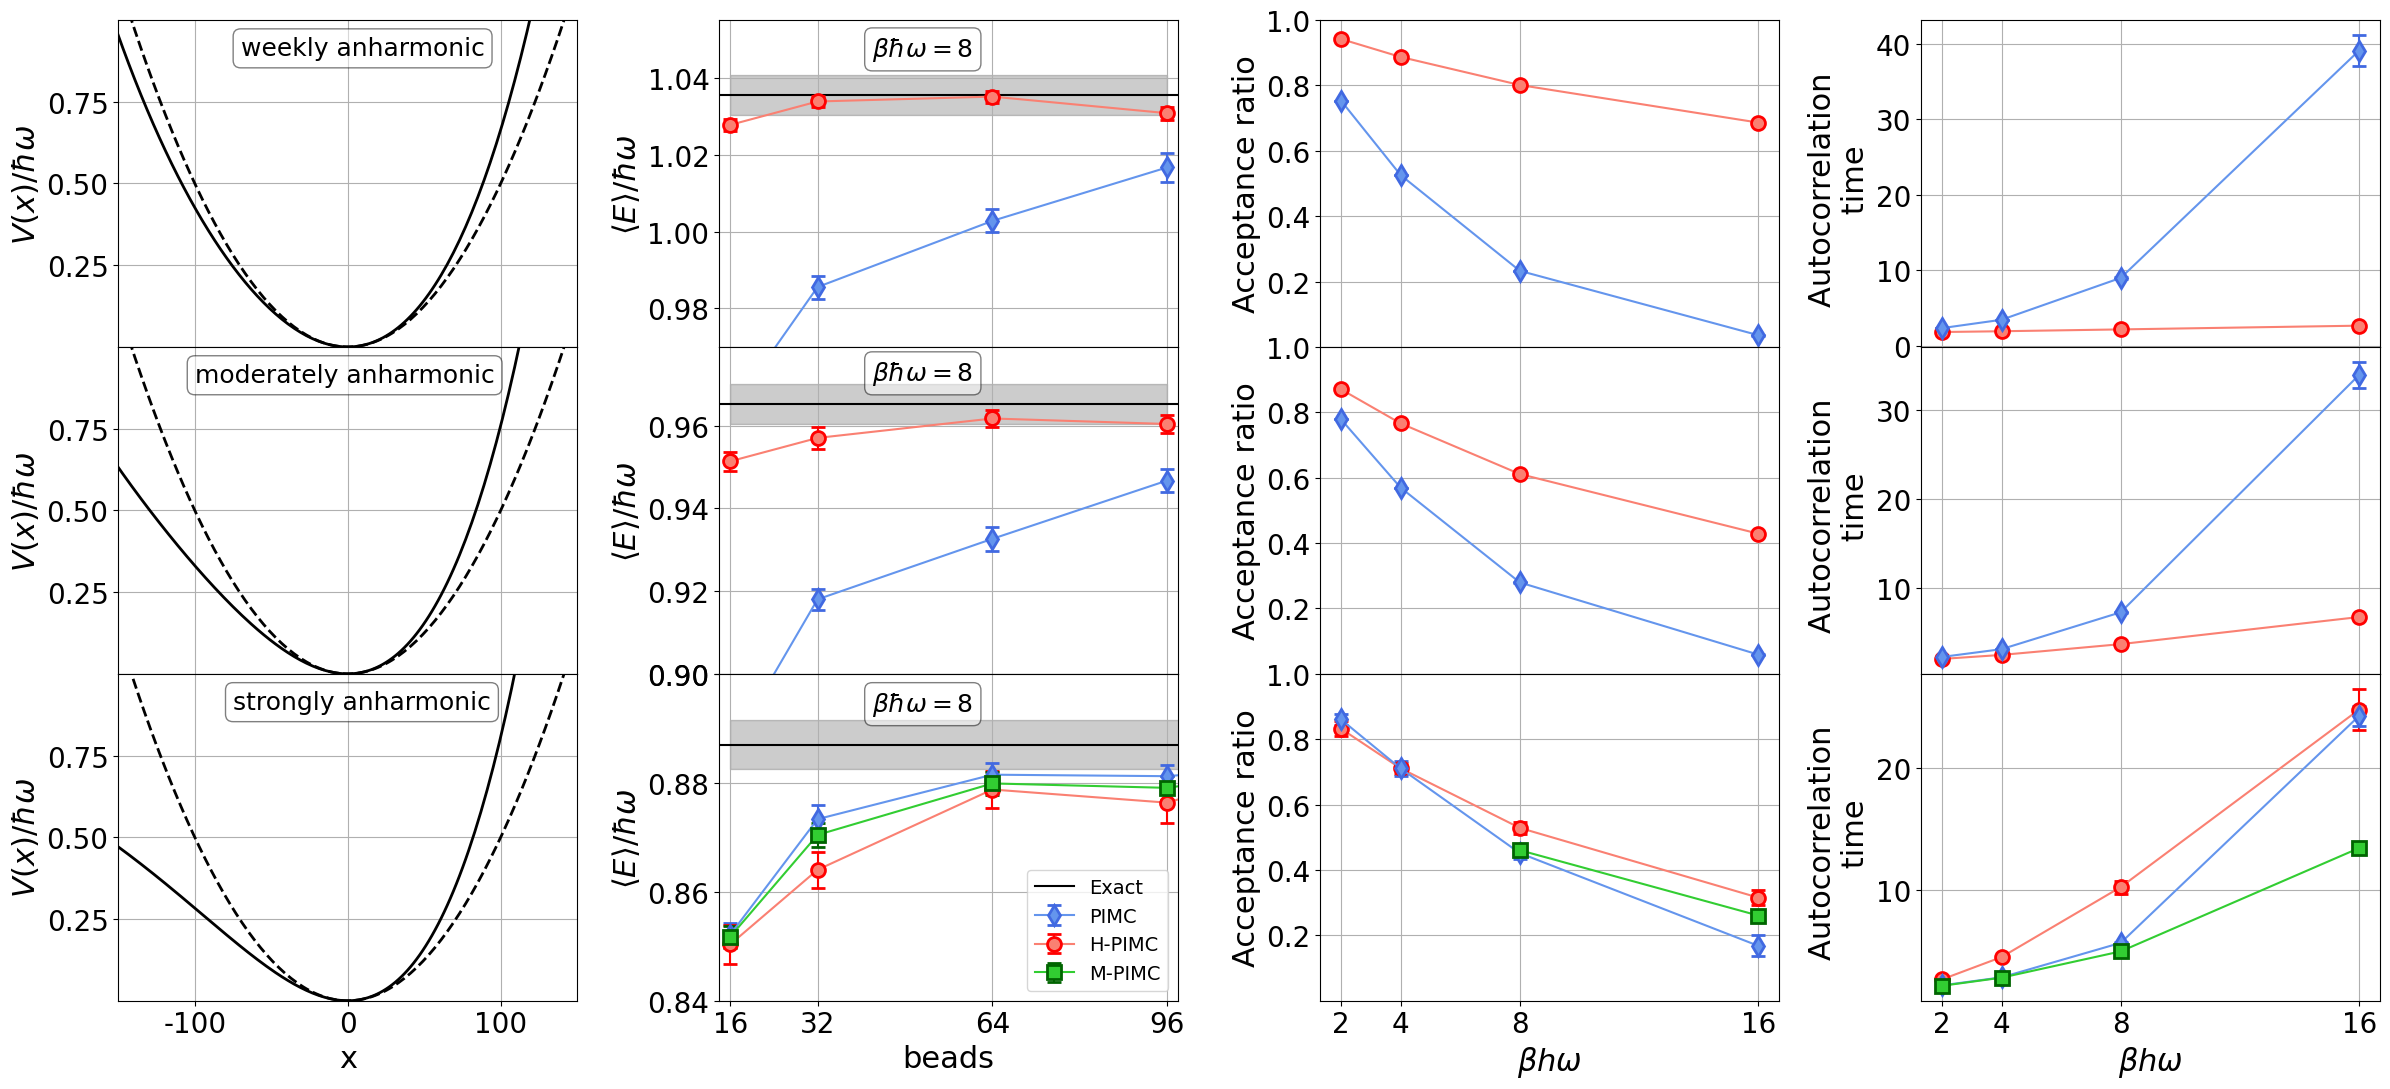

In [10]:
fig,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12)) = plt.subplots(3,4,figsize=(24,11),sharex='col')

x = np.linspace(-10,10,1000,endpoint=True)

#Weakly anharmonic plots
ax1.plot(x,V(x,0.2381,0.0907),linewidth=2, color='k', label='Full potential')
ax1.plot(x,0.5*(x*x),'--', linewidth=2, color='k', label='Harmonic approximation')
ax1.text(-0.7, 0.95, f'weekly anharmonic', fontsize=18, va='top', ha='left', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,1)
ax1.grid()
ax1.set_yticks([0.25, 0.5, 0.75])
ax1.set_ylabel(r'$V(x)/\hbar\omega$', fontsize=22)
#ax1.plot(x,0.5*x*x + 0.5*0.2381*x*x*x + 0.5*0.0907*x*x*x*x)
ax2.axhline(1.0354300351419057, 0,96,linestyle='-', color='k')
ax2.text(42, 1.051, f'$\\beta \\hbar \\omega = 8$', fontsize=18, va='top', ha='left', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
ax2.fill_between(wanh_f[2,8:12], [1.0354300351419057 * 0.995]*len(wanh_f[1,8:12]), [1.0354300351419057 * 1.005]*len(wanh_f[1,8:12]), color='k', alpha=0.2)
ax2.errorbar(wanh_f[2,8:12], wanh_f[5,8:12], yerr=wanh_f[6,8:12], linestyle='-', marker='d', markersize=10, color='cornflowerblue', markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2, ecolor = 'royalblue', capsize=5, label=f'PIMC')
ax2.errorbar(wanh_h[2,8:12], wanh_h[7,8:12], yerr=wanh_h[8,8:12], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2, ecolor = 'red', capsize=5, label=f'H-PIMC')
ax2.set_ylabel('$\\langle E \\rangle / \\hbar \\omega$', fontsize=22)
#ax2.legend(fontsize=14)
ax2.grid()
ax2.set_xlim([14, 98])
ax2.set_ylim([0.97,1.055])
#ax2.set_xticks([16, 32, 64, 96])
ax3.errorbar(wanh_h[0,[3,7,11,15]],wanh_h[3,[3,7,11,15]],yerr=wanh_h[4,[3,7,11,15]], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2, ecolor = 'red', capsize=5, label=f'H-PIMC')
ax3.errorbar(wanh_f[0,[3,7,11,15]],wanh_f[3,[3,7,11,15]],yerr=wanh_f[4,[3,7,11,15]], linestyle='-', marker='d', markersize=10, color='cornflowerblue', markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2, ecolor = 'royalblue', capsize=5, label=f'PIMC')
ax3.set_ylim(0,1)
ax3.set_ylabel('Acceptance ratio', fontsize=22)
ax3.grid()
ax3.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax4.errorbar(wanh_autocorr[0,[1,3,5,7]], wanh_autocorr[3,[1,3,5,7]], yerr=wanh_autocorr[4,[1,3,5,7]], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2, ecolor = 'red', capsize=5, label=f'H-PIMC')
ax4.errorbar(wanh_autocorr[0,[0,2,4,6]], wanh_autocorr[3,[0,2,4,6]], yerr=wanh_autocorr[4,[0,2,4,6]], linestyle='-', marker='d', markersize=10, color='cornflowerblue', markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2, ecolor = 'royalblue', capsize=5, label=f'H-PIMC')
#ax4.set_xlim([14, 98])
ax4.set_ylabel('Autocorrelation \n time', fontsize=22)
ax4.grid()

#Moderately anharmonic plots
ax5.plot(x,V(x,0.4286,0.0907),linewidth=2, color='k', label='Full potential')
ax5.plot(x,0.5*(x*x),'--', linewidth=2, color='k', label='Harmonic approximation')
ax5.text(-1.0, 0.95, f'moderately anharmonic', fontsize=18, va='top', ha='left', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
ax5.set_xlim(-1.5,1.5)
ax5.set_ylim(0,1)
ax5.set_yticks([0.25, 0.5, 0.75])
ax5.grid()
ax5.set_ylabel(r'$V(x)/\hbar\omega$', fontsize=22)
ax6.axhline(0.9652296, 0,96,linestyle='-', color='k')
ax6.text(42, 0.976, f'$\\beta \\hbar \\omega = 8$', fontsize=18, va='top', ha='left', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
ax6.fill_between(manh_f[2,8:12], [0.9652296 * 0.995]*len(manh_f[2,8:12]), [0.9652296 * 1.005]*len(manh_f[2,8:12]), color='k', alpha=0.2)
ax6.errorbar(manh_f[2,8:12], manh_f[5,8:12], yerr=manh_f[6,8:12], linestyle='-', marker='d', markersize=10, color='cornflowerblue', markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2, ecolor = 'royalblue', capsize=5, label=f'PIMC')
ax6.errorbar(manh_h[2,8:12], manh_h[7,8:12], yerr=manh_h[8,8:12], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2, ecolor = 'red', capsize=5, label=f'H-PIMC')
ax6.set_ylabel('$\\langle E \\rangle / \\hbar \\omega$', fontsize=22)
#ax6.legend(fontsize=14)
ax6.grid()
#ax6.set_xlim([14, 0.979])
ax6.set_ylim([0.90,0.979])
#ax6.set_xticks([16, 32, 64, 96])
ax7.errorbar(manh_h[0,[3,7,11,15]],manh_h[3,[3,7,11,15]],yerr=manh_h[4,[3,7,11,15]], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2, ecolor = 'red', capsize=5, label=f'H-PIMC')
ax7.errorbar(manh_f[0,[3,7,11,15]],manh_f[3,[3,7,11,15]],yerr=manh_f[4,[3,7,11,15]], linestyle='-', marker='d', markersize=10, color='cornflowerblue', markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2, ecolor = 'royalblue', capsize=5, label=f'PIMC')
ax7.set_ylabel('Acceptance ratio', fontsize=22)
ax7.set_ylim(0,1)
ax7.grid()
ax7.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax8.errorbar(manh_autocorr[0,[1,3,5,7]], manh_autocorr[3,[1,3,5,7]], yerr=manh_autocorr[4,[1,3,5,7]], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2, ecolor = 'red', capsize=5, label=f'H-PIMC')
ax8.errorbar(manh_autocorr[0,[0,2,4,6]], manh_autocorr[3,[0,2,4,6]], yerr=manh_autocorr[4,[0,2,4,6]], linestyle='-', marker='d', markersize=10, color = 'cornflowerblue', markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2, ecolor = 'royalblue', capsize=5, label=f'H-PIMC')
ax8.set_ylabel('Autocorrelation \n time', fontsize=22)
ax8.grid()

#Strongly anharmonic plots
ax9.plot(x,V(x,0.5238,0.0907),linewidth=2, color='k', label='Full potential')
ax9.plot(x,0.5*(x*x),'--', linewidth=2, color='k', label='Harmonic approximation')
ax9.set_ylim(0,1)
ax9.text(-0.75, 0.95, f'strongly anharmonic', fontsize=18, va='top', ha='left', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
ax9.grid()
ax9.set_yticks([0.25, 0.5, 0.75])
ax9.set_ylabel(r'$V(x)/\hbar\omega$', fontsize=22)
ax10.axhline(0.88702, 0,96,linestyle='-', color='k', label='Exact')
ax10.fill_between(sanh_f_e[1], [0.88702 * 0.995]*len(sanh_f_e[1]), [0.88702 * 1.005]*len(sanh_f_e[1]), color='k', alpha=0.2)
ax10.errorbar(sanh_f_e[1], sanh_f_e[6], yerr=sanh_f_e[7], linestyle='-', marker='d', markersize=10, color='cornflowerblue', markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2, ecolor = 'royalblue', capsize=5, label=f'PIMC')
ax10.errorbar(sanh_h_e[1], sanh_h_e[6], yerr=sanh_h_e[7], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2, ecolor = 'red', capsize=5, label=f'H-PIMC')
ax10.errorbar(sanh_m_e[1], sanh_m_e[6], yerr=sanh_m_e[7], linestyle='-', marker='s', markersize=10, color='limegreen', markerfacecolor='limegreen', markeredgecolor='darkgreen', markeredgewidth=2, ecolor = 'darkgreen', capsize=5, label=f'M-PIMC')
ax10.set_ylabel('$\\langle E \\rangle / \\hbar \\omega$', fontsize=22)
ax10.text(42, 0.897, f'$\\beta \\hbar \\omega = 8$', fontsize=18, va='top', ha='left', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
ax10.legend(loc='lower right',fontsize=14)
ax10.grid()
ax10.set_ylim(0.84,0.90)
ax11.errorbar(sanh_h[0],sanh_h[1],sanh_h[2], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2, ecolor = 'red', capsize=5, label=f'H-PIMC')
ax11.errorbar(sanh_f[0],sanh_f[1],sanh_f[2], linestyle='-', marker='d', markersize=10,color='cornflowerblue',  markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2, ecolor = 'royalblue', capsize=5, label=f'H-PIMC')
ax11.errorbar([8,16], [0.46042500,0.26058750], yerr=[0.00143862,0.00339479], linestyle='-', marker='s', markersize=10, color='limegreen', markerfacecolor='limegreen', markeredgecolor='darkgreen', markeredgewidth=2, ecolor = 'darkgreen', capsize=5, label=f'M-PIMC')
ax11.set_ylabel('Acceptance ratio', fontsize=22)
ax11.set_ylim(0,1)
ax11.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax11.grid()
ax12.errorbar([2,4,8,16], sanh_autorocorr[3][8:], yerr=sanh_autorocorr[4][8:], linestyle='-', marker='o', markersize=10, color='salmon', markerfacecolor='salmon', markeredgecolor='red', markeredgewidth=2, ecolor = 'red', capsize=5, label=f'H-PIMC')
ax12.errorbar([2,4,8,16], sanh_autorocorr[3][:4], yerr=sanh_autorocorr[4][:4], linestyle='-', marker='d', markersize=10, color='cornflowerblue', markerfacecolor='cornflowerblue', markeredgecolor='royalblue', markeredgewidth=2, ecolor = 'royalblue', capsize=5, label=f'H-PIMC')
ax12.errorbar([2,4,8,16], sanh_autorocorr[3][4:8], yerr=sanh_autorocorr[4][4:8], linestyle='-', marker='s', markersize=10, color='limegreen', markerfacecolor='limegreen', markeredgecolor='darkgreen', markeredgewidth=2, ecolor = 'darkgreen', capsize=5, label=f'M-PIMC')
ax12.set_ylabel('Autocorrelation \n time', fontsize=22)
ax12.grid()

ax9.set_xlim([-1.5, 1.5])
ax9.set_xticks([-1.0,0.0, 1.0],labels=[-100,0, 100])
ax9.set_xlabel('x', fontsize=22)
ax10.set_xlim([14, 98])
ax10.set_xticks([16, 32, 64, 96])
ax10.set_xlabel('beads', fontsize=22)
ax11.set_xticks([2, 4, 8, 16])
ax11.set_xlabel(r'$\beta h\omega$', fontsize=22)
ax12.set_xticks([2, 4, 8, 16])
ax12.set_xlabel(r'$\beta h\omega$', fontsize=22)

for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]:
    ax.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig('../figures/ManyBodyAnharmonic.pdf')